In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_csv("merge.csv")

In [47]:
col = df.columns
col
#failures, studytime,freetime,absences, schoolsup
#age, failures, Fjob, freetime, guardian, Mjob, schoolsup, sex, studytime, traveltime, Walc

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x',
       'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y'],
      dtype='object')

In [18]:
df.shape

(382, 53)

In [ ]:
df = df.drop(['guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y','school','address','famsize','Medu', 'Fedu',
        'reason', 'nursery', 'internet',
       'famsize', 'Pstatus','famsup.x','absences.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x','goout.x', 'Dalc.x', 'health.x'],axis=1)

In [16]:
df.dtypes

school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
nursery         object
internet        object
guardian.x      object
traveltime.x     int64
studytime.x      int64
failures.x       int64
schoolsup.x     object
famsup.x        object
paid.x          object
activities.x    object
higher.x        object
romantic.x      object
famrel.x         int64
freetime.x       int64
goout.x          int64
Dalc.x           int64
Walc.x           int64
health.x         int64
absences.x       int64
G1.x             int64
G2.x             int64
G3.x             int64
guardian.y      object
traveltime.y     int64
studytime.y      int64
failures.y       int64
schoolsup.y     object
famsup.y        object
paid.y          object
activities.y    object
higher.y        object
romantic.y      object
famrel.y   

In [ ]:
#duplicate_rows_df = df[df.duplicated()]   # NO DUPLICATES FOUND
#duplicate_rows_df

In [ ]:
#print(df.isnull().sum())         #NO NULL VALUES FOUND

In [ ]:
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)

In [ ]:
#import colormaps as cmaps
corr = df.corr()
sns.pairplot(corr)
#sns.heatmap(corr[(corr>=0.5)|(corr<=-0.4)],cmap='rainbow_r',vmax=1.0,vmin=-1.0,linewidths=0.1,annot=True,annot_kws={'size':8},square=True);

In [ ]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c)
c

In [ ]:
target1 = df['G1.x']
target2 = df['G2.x']
target3 = df['G3.x']

In [ ]:
df['ID'] = np.arange(len(df))

In [ ]:
features = df.drop(['G1.x','G2.x','G3.x','ID'],axis=1)

In [ ]:
col = features.columns
col

In [20]:
import plotly.graph_objects as go

import numpy as np

x0 = df['G1.x']
# Add 1 to shift the mean of the Gaussian distribution
x1 = df['G2.x']
x2 = df['G3.x']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))
fig.add_trace(go.Histogram(x=x2))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
features.dtypes

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target2,test_size=0.25)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
features['schoolsup.x'] = le.fit_transform(features['schoolsup.x'])
features['sex'] = le.fit_transform(features['sex'])
features['Mjob'] = le.fit_transform(features['Mjob'])
features['Fjob'] = le.fit_transform(features['Fjob'])
features['guardian.x'] = le.fit_transform(features['guardian.x'])

In [21]:
import plotly.graph_objects as go

import numpy as np

x = df['G1.x']
fig = go.Figure(data=[go.Histogram(x=x, histnorm='probability')])

fig.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
print("Accuracy for g1:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
print("Accuracy for g2:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
print("Accuracy for g3:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
x = clf.feature_importances_

In [ ]:
x = pd.DataFrame(x)

In [ ]:
x.head()

In [ ]:
x = x.rename(columns={0:'Feature importance'})

In [ ]:
x['features'] = ""
for i in range(len(col)):
    x['features'][i] = col[i]

In [ ]:
x.to_csv("g3y.csv")

In [73]:
import plotly.graph_objects as go

random_x = df['paid.x']
random_y0 = df['paid.y']


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='lines',
                    name='lines'))
# fig.add_trace(go.Scatter(x=random_x, y=random_y1,
#                     mode='lines+markers',
#                     name='lines+markers'))
# fig.add_trace(go.Scatter(x=random_x, y=random_y2,
#                     mode='lines',
#                     name='lines'))

fig.show()

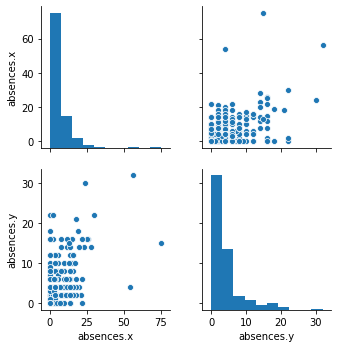

In [59]:
import seaborn as sns
cols = ['absences.x','absences.y']
sns.pairplot(df[cols]);

In [71]:
import plotly.graph_objects as go

import numpy as np
x0 = df['paid.x']
x1 = df['paid.y']

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=x0,
    #histnorm='percent',
    name='Mathematics', # name used in legend and hover labels
    #xbins=dict( # bins used for histogram
       # start=-4.0,
      #  end=3.0,
     #   size=0.5
    #),
    marker_color='#EB89B5',
    opacity=0.75
))
fig.add_trace(go.Histogram(
    x=x1,
    #histnorm='percent',
    name='Portuguese',
    #xbins=dict(
     #   start=-3.0,
      #  end=4,
       # size=0.5
    #),
    marker_color='#330C73',
    opacity=0.75
))

fig.update_layout(
    title_text='Failures graphs', # title of plot
    xaxis_title_text='Extra Paid Classes', # xaxis label
    yaxis_title_text='Number of Students', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()